In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

# Paths
ROOT = Path.cwd().parent if Path.cwd().name.lower()=="notebooks" else Path.cwd()
RAW = ROOT / "data" / "raw" / "assistant"
OUT_SAMPLES = ROOT / "data" / "samples" / "ec2"
OUT_SAMPLES.mkdir(parents=True, exist_ok=True)

files = sorted([p for p in RAW.glob("*") if p.suffix.lower() in [".npy", ".npz"]])

summary_rows = []
for p in files:
    try:
        if p.suffix.lower() == ".npy":
            arr = np.load(p, allow_pickle=False)
            summary_rows.append([p.name, "npy", arr.shape, str(arr.dtype)])

            # tiny preview CSV (only if 1D or 2D)
            if arr.ndim == 1:
                df = pd.DataFrame({"value": arr[:10]})
            elif arr.ndim == 2:
                df = pd.DataFrame(arr[:10, :min(10, arr.shape[1])])
            else:
                df = pd.DataFrame({"notice":[f"{p.name} has {arr.ndim} dims; no tabular preview"]})
            df.to_csv(OUT_SAMPLES / f"{p.stem}_preview.csv", index=False)

        elif p.suffix.lower() == ".npz":
            z = np.load(p, allow_pickle=False)
            keys = list(z.keys())
            # add one row per array inside
            for k in keys:
                arr = z[k]
                summary_rows.append([f"{p.name}::{k}", "npz", arr.shape, str(arr.dtype)])
            # preview from the first 1D/2D array, if any
            for k in keys:
                arr = z[k]
                if arr.ndim in (1,2):
                    if arr.ndim == 1:
                        df = pd.DataFrame({"value": arr[:10]})
                    else:
                        df = pd.DataFrame(arr[:10, :min(10, arr.shape[1])])
                    df.to_csv(OUT_SAMPLES / f"{p.stem}_{k}_preview.csv", index=False)
                    break
    except Exception as e:
        summary_rows.append([p.name, "error", None, str(e)])

# Build & save summary table
summary = pd.DataFrame(summary_rows, columns=["file","type","shape","dtype"])
summary_path = OUT_SAMPLES / "assistant_file_summary.csv"
summary.to_csv(summary_path, index=False)

print("RAW assistant folder:", RAW)
print("Wrote summary:", summary_path)
summary


RAW assistant folder: C:\Users\amirn\thesis-rc-beam\data\raw\assistant
Wrote summary: C:\Users\amirn\thesis-rc-beam\data\samples\ec2\assistant_file_summary.csv


,file,type,shape,dtype
0,ACI440_Mn.npy,npy,"(100, 301, 100)",float64
1,Ana_TTC_M_u.npy,npy,"(100, 301, 100)",float64
2,Design_space2.npy,npy,"(3010000, 3)",float64
3,designspace_meshgrid_data.npz::rho_mesh,npz,"(100, 301, 100)",float64
4,designspace_meshgrid_data.npz::b_mesh,npz,"(100, 301, 100)",float64
5,designspace_meshgrid_data.npz::d_mesh,npz,"(100, 301, 100)",float64
6,Mu2.npy,npy,"(3010000,)",float64


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

p = Path(r"C:\Users\amirn\sciebo\thesis-data\raw\assistant\Design_space2.npy")
arr = np.load(p, allow_pickle=False)
print("Shape:", arr.shape)
print("Dtype:", arr.dtype)

# show quick numeric stats
df = pd.DataFrame(arr)
desc = df.describe().T
display(desc.head(10))


Shape: (3010000, 3)
Dtype: float64


,count,mean,std,min,25%,50%,75%,max
0,3010000.0,1.005,0.576375,0.01,0.5075,1.005,1.5025,2.0
1,3010000.0,505.000,288.660748,10.00,257.5000,505.000,752.5000,1000.0
2,3010000.0,505.000,288.660748,10.00,257.5000,505.000,752.5000,1000.0


In [3]:
from pathlib import Path
import numpy as np

RAW = Path.cwd().parent / "data" / "raw" / "assistant"
X = np.load(RAW / "Design_space2.npy", allow_pickle=False)
print("Design_space2:", X.shape, X.dtype)


Design_space2: (3010000, 3) float64


In [5]:
import numpy as np, pandas as pd
X = np.load(r"C:\Users\amirn\sciebo\thesis-data\raw\assistant\Design_space2.npy", allow_pickle=False)
pd.DataFrame(X).head()


,0,1,2
0,0.01,10.0,10.0
1,0.01,10.0,20.0
2,0.01,10.0,30.0
3,0.01,10.0,40.0
4,0.01,10.0,50.0


In [6]:
z = np.load(r"C:\Users\amirn\sciebo\thesis-data\raw\assistant/designspace_meshgrid_data.npz", allow_pickle=False)
list(z.keys())  # then z['some_key']


['rho_mesh', 'b_mesh', 'd_mesh']

In [10]:
y_flat = np.ravel(y)  # or y.flatten()

print("Flattened shape:", y_flat.shape)

# Verify consistency
if len(y_flat) == len(X):
    print("✅ Perfect! Now the dimensions match.")
else:
    print("⚠️ Still mismatch — check variable order.")


Flattened shape: (3010000,)
✅ Perfect! Now the dimensions match.


Design_space2 shape: (3010000, 3)
Flattened ACI440_Mn shape: (3010000,)

Summary statistics (Moment capacity, Mn):


,count,mean,std,min,25%,50%,75%,max
Mn,3010000.0,958.66695,1272.488858,0.000084,80.772743,411.709403,1342.51439,8217.915561


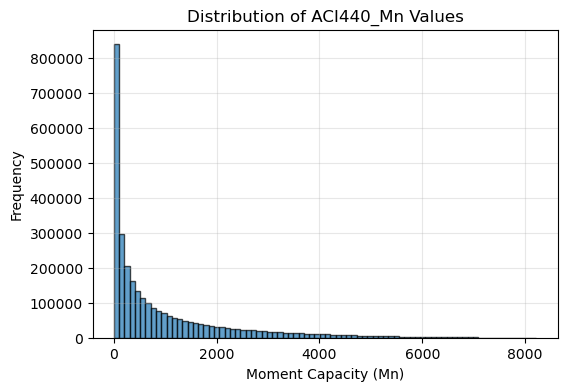

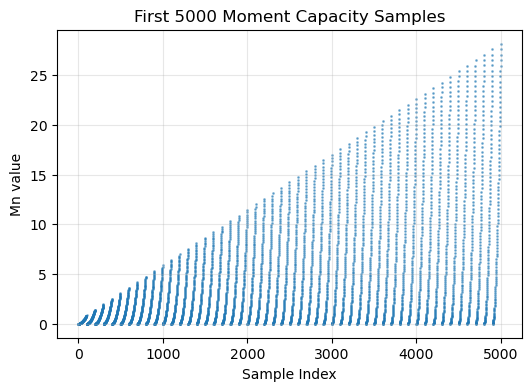

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

# --- Paths
RAW = Path(r"C:\Users\amirn\thesis-rc-beam\data\raw\assistant")

# --- Load files
X = np.load(RAW / "Design_space2.npy", allow_pickle=False)
y = np.load(RAW / "ACI440_Mn.npy", allow_pickle=False)
y_flat = y.ravel()

# --- Check consistency
print(f"Design_space2 shape: {X.shape}")
print(f"Flattened ACI440_Mn shape: {y_flat.shape}")

# --- Basic numeric overview
df_y = pd.DataFrame(y_flat, columns=["Mn"])
print("\nSummary statistics (Moment capacity, Mn):")
display(df_y.describe().T)

# --- Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(y_flat, bins=80, edgecolor='k', alpha=0.7)
plt.title("Distribution of ACI440_Mn Values")
plt.xlabel("Moment Capacity (Mn)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

# --- Quick scatter check (only first 5000 samples)
plt.figure(figsize=(6, 4))
plt.scatter(range(5000), y_flat[:5000], s=1, alpha=0.5)
plt.title("First 5000 Moment Capacity Samples")
plt.xlabel("Sample Index")
plt.ylabel("Mn value")
plt.grid(True, alpha=0.3)
plt.show()


Shape: (3010000,)
Dtype: float64

Mn_flat: (3010000,), Mu2_flat: (3010000,)

Summary statistics for Mu2:


,count,mean,std,min,25%,50%,75%,max
Mu2,3010000.0,1106.963671,1498.854805,0.000089,89.573795,461.043973,1527.171674,9787.313603


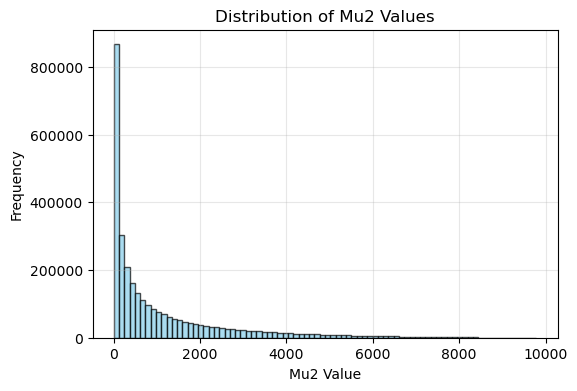

In [12]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# --- Path
RAW = Path(r"C:\Users\amirn\thesis-rc-beam\data\raw\assistant")

# --- Load
y_mu2 = np.load(RAW / "Mu2.npy", allow_pickle=False)
print("Shape:", y_mu2.shape)
print("Dtype:", y_mu2.dtype)

# --- Flatten (if needed)
if y_mu2.ndim > 1:
    y_mu2_flat = y_mu2.ravel()
    print("Flattened shape:", y_mu2_flat.shape)
else:
    y_mu2_flat = y_mu2

# --- Compare with ACI440_Mn
y_mn = np.load(RAW / "ACI440_Mn.npy", allow_pickle=False).ravel()
print(f"\nMn_flat: {y_mn.shape}, Mu2_flat: {y_mu2_flat.shape}")

# --- Basic stats
df_mu2 = pd.DataFrame(y_mu2_flat, columns=['Mu2'])
print("\nSummary statistics for Mu2:")
display(df_mu2.describe().T)

# --- Histogram
plt.figure(figsize=(6,4))
plt.hist(y_mu2_flat, bins=80, color='skyblue', edgecolor='k', alpha=0.7)
plt.title("Distribution of Mu2 Values")
plt.xlabel("Mu2 Value")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()


Shape: (100, 301, 100)
Dtype: float64
Flattened shape: (3010000,)

ACI440_Mn: (3010000,), Mu2: (3010000,), Ana_TTC_M_u: (3010000,)

Summary statistics for Ana_TTC_M_u:


,count,mean,std,min,25%,50%,75%,max
Ana_TTC_M_u,3010000.0,1106.963671,1498.854805,0.000089,89.573795,461.043973,1527.171674,9787.313603


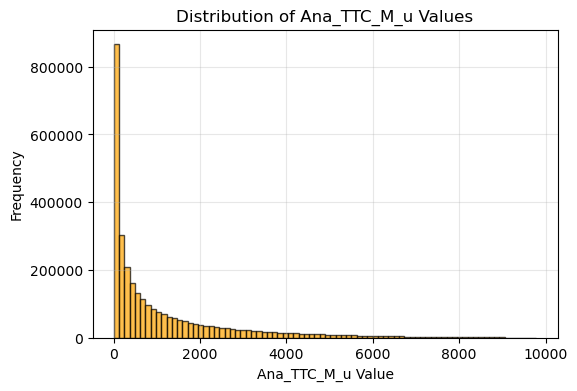

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- Path
RAW = Path(r"C:\Users\amirn\thesis-rc-beam\data\raw\assistant")

# --- Load the file
y_ttc = np.load(RAW / "Ana_TTC_M_u.npy", allow_pickle=False)
print("Shape:", y_ttc.shape)
print("Dtype:", y_ttc.dtype)

# --- Flatten if needed
if y_ttc.ndim > 1:
    y_ttc_flat = y_ttc.ravel()
    print("Flattened shape:", y_ttc_flat.shape)
else:
    y_ttc_flat = y_ttc

# --- Compare with previous arrays
y_mn = np.load(RAW / "ACI440_Mn.npy", allow_pickle=False).ravel()
y_mu2 = np.load(RAW / "Mu2.npy", allow_pickle=False).ravel()
print(f"\nACI440_Mn: {y_mn.shape}, Mu2: {y_mu2.shape}, Ana_TTC_M_u: {y_ttc_flat.shape}")

# --- Stats
df_ttc = pd.DataFrame(y_ttc_flat, columns=['Ana_TTC_M_u'])
print("\nSummary statistics for Ana_TTC_M_u:")
display(df_ttc.describe().T)

# --- Histogram
plt.figure(figsize=(6,4))
plt.hist(y_ttc_flat, bins=80, color='orange', edgecolor='k', alpha=0.7)
plt.title("Distribution of Ana_TTC_M_u Values")
plt.xlabel("Ana_TTC_M_u Value")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()


In [14]:
import numpy as np
from pathlib import Path

# --- Path
RAW = Path(r"C:\Users\amirn\thesis-rc-beam\data\raw\assistant")

# --- Load the NPZ container
mesh = np.load(RAW / "designspace_meshgrid_data.npz")

# --- Display keys
print("Keys available in this file:")
for k in mesh.files:
    print("  -", k, mesh[k].shape, mesh[k].dtype)

# --- Optional: show a few sample values for each key
print("\nSample values:")
for k in mesh.files:
    arr = mesh[k]
    print(f"{k}: min={arr.min():.3f}, max={arr.max():.3f}, mean={arr.mean():.3f}")


Keys available in this file:
  - rho_mesh (100, 301, 100) float64
  - b_mesh (100, 301, 100) float64
  - d_mesh (100, 301, 100) float64

Sample values:
rho_mesh: min=0.010, max=2.000, mean=1.005
b_mesh: min=10.000, max=1000.000, mean=505.000
d_mesh: min=10.000, max=1000.000, mean=505.000
